### Вводные данные для обучения

Объявление применяеных библиотек

In [1]:
#!/opt/anaconda/envs/bd9/bin/python

import os
import pandas as pd
import numpy as np
import seaborn as sns # Для визуализации данных.
import matplotlib.pyplot as plt
# Параметр, позволяющий визуализировать графики без show()
%matplotlib inline 
from sklearn import preprocessing

Объявление директорий для train и test-набора

In [2]:
home_dir = '/data/share/lab04data'

train_file = "lab04_train.csv"
test_file = "lab04_test.csv"

train_dir = home_dir+'/'+train_file
test_dir = home_dir+'/'+test_file

print(home_dir+'/'+train_file)

/data/share/lab04data/lab04_train.csv


Вывод данных train-набора

In [3]:
train_df = pd.read_csv (train_dir)
train_df.tail(10)

,Unnamed: 0,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
320754,83534,230375,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
320755,228984,375825,0,0.000000,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
320756,367774,514615,1,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
320757,193334,340175,1,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,0.0,0.132616,0.132616,0.0,0.0,0.064516,0.064516,0.064516,0.0
320758,13300,160141,0,0.000000,NaN,NaN,NaN,NaN,0.0,0.125,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
320759,351454,498295,0,0.000000,NaN,42.0,NaN,NaN,0.0,NaN,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
320760,421102,567943,0,0.143985,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
320761,360104,506945,0,0.043560,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
320762,180350,327191,0,0.007867,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
320763,222683,369524,0,0.019900,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
train_df.shape # Количество строк и колонок

(320764, 117)

### Обработка данных

Подсчитывает уникальные значения в колонке TARGET

In [5]:
train_df['TARGET'].value_counts(dropna=False)

 0.0    294607
 1.0     26156
NaN          1
Name: TARGET, dtype: int64

В TARGET должны быть точные значения, поэтому заменить нельзя. NaN нужно удалить

In [6]:
train_df = train_df[train_df['TARGET'].notna()]
train_df.shape

(320763, 117)

Преобразуем TARGET-значения в int, потому что в колонке только значения 0 и 1

In [7]:
train_df['TARGET'] = train_df['TARGET'].round(0).astype(int)

In [8]:
train_df['TARGET'].value_counts(dropna = False)

0    294607
1     26156
Name: TARGET, dtype: int64

Проверяю типы данных в таблице

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320763 entries, 0 to 320762
Columns: 117 entries, Unnamed: 0 to TARGET
dtypes: float64(100), int64(4), object(13)
memory usage: 288.8+ MB


Выводим данные из колонок типа object

In [10]:
object_columns = train_df.select_dtypes(include=object).columns
train_df.select_dtypes(include=object)

,CLNT_TRUST_RELATION,APP_MARITAL_STATUS,APP_KIND_OF_PROP_HABITATION,CLNT_JOB_POSITION_TYPE,CLNT_JOB_POSITION,APP_DRIVING_LICENSE,APP_EDUCATION,APP_TRAVEL_PASS,APP_CAR,APP_POSITION_TYPE,APP_EMP_TYPE,APP_COMP_TYPE,PACK
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102
1,NaN,NaN,NaN,NaN,офис-менеджер,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102
2,NaN,NaN,NaN,NaN,консультант,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K01
4,NaN,NaN,NaN,NaN,экономист,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K01
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102
6,NaN,NaN,NaN,NaN,Младший научный сотрудник,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O01
7,NaN,M,RENT,NaN,ДИРЕКТОР,Y,UH,N,N,MANAGER,PRIVATE,PRIVATE,O01
8,FRIEND,V,NaN,MANAGER,СПЕЦИАЛИСТ,NaN,H,NaN,NaN,SPECIALIST,PRIVATE,PRIVATE,K01
9,NaN,NaN,NaN,NaN,глав.бухгалтер,NaN,NaN,NaN,NaN,NaN,NaN,NaN,K01


Смотрим статистику по колонкам типа object 

In [11]:
train_df.select_dtypes(include=object).describe()

,CLNT_TRUST_RELATION,APP_MARITAL_STATUS,APP_KIND_OF_PROP_HABITATION,CLNT_JOB_POSITION_TYPE,CLNT_JOB_POSITION,APP_DRIVING_LICENSE,APP_EDUCATION,APP_TRAVEL_PASS,APP_CAR,APP_POSITION_TYPE,APP_EMP_TYPE,APP_COMP_TYPE,PACK
count,62935,61775,53722,40522,190393,51896,61665,51896,51895,54780,60986,60986,320763
unique,22,13,5,4,19053,2,17,2,2,4,4,4,12
top,FRIEND,M,SO,SPECIALIST,ДИРЕКТОР,N,H,N,N,SPECIALIST,PRIVATE,PRIVATE,102
freq,22613,27848,25461,22741,10075,32938,38499,47829,29760,33154,53529,53529,105756


Если в колонке высокая гранулярность, то ее можно удалить из набора или разбить на группы

In [12]:
train_df.select_dtypes(include=object).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320763 entries, 0 to 320762
Data columns (total 13 columns):
CLNT_TRUST_RELATION            62935 non-null object
APP_MARITAL_STATUS             61775 non-null object
APP_KIND_OF_PROP_HABITATION    53722 non-null object
CLNT_JOB_POSITION_TYPE         40522 non-null object
CLNT_JOB_POSITION              190393 non-null object
APP_DRIVING_LICENSE            51896 non-null object
APP_EDUCATION                  61665 non-null object
APP_TRAVEL_PASS                51896 non-null object
APP_CAR                        51895 non-null object
APP_POSITION_TYPE              54780 non-null object
APP_EMP_TYPE                   60986 non-null object
APP_COMP_TYPE                  60986 non-null object
PACK                           320763 non-null object
dtypes: object(13)
memory usage: 34.3+ MB


Трансформируем object-колонки в числовые значения (get_dummies лучше, но сложнее. Попробовать потом!)

In [13]:
le = preprocessing.LabelEncoder()
for column_name in train_df.columns:
    if train_df[column_name].dtype == object:
        train_df[column_name] = le.fit_transform(train_df[column_name].astype(str)) 
    else:
        pass

In [14]:
train_df[object_columns].head()

,CLNT_TRUST_RELATION,APP_MARITAL_STATUS,APP_KIND_OF_PROP_HABITATION,CLNT_JOB_POSITION_TYPE,CLNT_JOB_POSITION,APP_DRIVING_LICENSE,APP_EDUCATION,APP_TRAVEL_PASS,APP_CAR,APP_POSITION_TYPE,APP_EMP_TYPE,APP_COMP_TYPE,PACK
0,9,10,5,4,357,2,16,2,2,4,4,4,1
1,9,10,5,4,16866,2,16,2,2,4,4,4,1
2,9,10,5,4,15545,2,16,2,2,4,4,4,1
3,9,10,5,4,357,2,16,2,2,4,4,4,9
4,9,10,5,4,18950,2,16,2,2,4,4,4,9


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320763 entries, 0 to 320762
Columns: 117 entries, Unnamed: 0 to TARGET
dtypes: float64(100), int64(17)
memory usage: 288.8 MB


Выбираем колонки типа int в отдельную таблицу

In [16]:
train_df.select_dtypes(include=int).head(10)

,Unnamed: 0,ID,CR_PROD_CNT_IL,CLNT_TRUST_RELATION,APP_MARITAL_STATUS,APP_KIND_OF_PROP_HABITATION,CLNT_JOB_POSITION_TYPE,CLNT_JOB_POSITION,APP_DRIVING_LICENSE,APP_EDUCATION,APP_TRAVEL_PASS,APP_CAR,APP_POSITION_TYPE,APP_EMP_TYPE,APP_COMP_TYPE,PACK,TARGET
0,333149,479990,0,9,10,5,4,357,2,16,2,2,4,4,4,1,0
1,303639,450480,0,9,10,5,4,16866,2,16,2,2,4,4,4,1,0
2,327113,473954,0,9,10,5,4,15545,2,16,2,2,4,4,4,1,0
3,384197,531038,0,9,10,5,4,357,2,16,2,2,4,4,4,9,0
4,202462,349303,0,9,10,5,4,18950,2,16,2,2,4,4,4,9,0
5,53398,200239,0,9,10,5,4,357,2,16,2,2,4,4,4,1,0
6,251372,398213,0,9,10,5,4,7066,2,16,2,2,4,4,4,11,0
7,71572,218413,1,9,3,3,4,2563,1,10,0,0,0,2,2,11,0
8,169965,316806,3,3,6,5,0,10801,2,4,2,2,2,2,2,9,1
9,257285,404126,0,9,10,5,4,14064,2,16,2,2,4,4,4,9,0


In [17]:
train_df.select_dtypes(include=int).sort_values(by='Unnamed: 0', ascending=True).head(20)

,Unnamed: 0,ID,CR_PROD_CNT_IL,CLNT_TRUST_RELATION,APP_MARITAL_STATUS,APP_KIND_OF_PROP_HABITATION,CLNT_JOB_POSITION_TYPE,CLNT_JOB_POSITION,APP_DRIVING_LICENSE,APP_EDUCATION,APP_TRAVEL_PASS,APP_CAR,APP_POSITION_TYPE,APP_EMP_TYPE,APP_COMP_TYPE,PACK,TARGET
105654,0,146841,0,9,10,5,4,16506,2,16,2,2,4,4,4,9,0
232818,1,146842,0,9,10,5,4,357,2,16,2,2,4,4,4,1,0
56841,2,146843,0,9,10,5,4,1898,2,16,2,2,4,4,4,1,0
282521,3,146844,0,9,10,5,4,6169,2,16,2,2,4,4,4,9,0
168642,4,146845,0,9,10,5,4,357,2,16,2,2,4,4,4,1,0
75831,6,146847,0,9,10,5,4,2945,2,16,2,2,4,4,4,4,0
48715,7,146848,0,9,10,5,4,17167,2,16,2,2,4,4,4,11,0
245254,8,146849,0,9,10,5,4,357,2,16,2,2,4,4,4,1,1
237450,9,146850,0,9,10,5,4,2266,2,16,2,2,4,4,4,11,0
178592,10,146851,0,9,10,5,4,564,2,16,2,2,4,4,4,11,0


Первые две колонки - обычные sequnces, поэтому можно удалить

In [18]:
train_df.drop(['Unnamed: 0','ID'], axis=1, inplace=True)
int_columns = train_df.select_dtypes(include=int).columns
train_df[int_columns].tail(20)

,CR_PROD_CNT_IL,CLNT_TRUST_RELATION,APP_MARITAL_STATUS,APP_KIND_OF_PROP_HABITATION,CLNT_JOB_POSITION_TYPE,CLNT_JOB_POSITION,APP_DRIVING_LICENSE,APP_EDUCATION,APP_TRAVEL_PASS,APP_CAR,APP_POSITION_TYPE,APP_EMP_TYPE,APP_COMP_TYPE,PACK,TARGET
320743,1,6,3,4,4,7493,1,4,1,1,0,2,2,1,0
320744,0,9,10,5,4,5194,2,16,2,2,4,4,4,1,0
320745,0,9,10,5,4,357,2,16,2,2,4,4,4,1,0
320746,0,9,10,5,4,17532,2,16,2,2,4,4,4,1,0
320747,0,9,10,5,4,2563,2,16,2,2,4,4,4,1,0
320748,0,4,3,5,4,4873,0,10,0,0,4,3,3,3,0
320749,0,9,10,5,4,3413,2,16,2,2,4,4,4,9,0
320750,0,9,10,5,4,17537,2,16,2,2,4,4,4,1,0
320751,0,9,10,5,4,357,2,16,2,2,4,4,4,1,0
320752,0,9,10,5,4,13941,2,16,2,2,4,4,4,1,0


Проверяем количество уникальных значений

In [19]:
for i in int_columns:
    print(train_df[i].unique().shape)

(12,)
(23,)
(14,)
(6,)
(5,)
(19054,)
(3,)
(18,)
(3,)
(3,)
(5,)
(5,)
(5,)
(12,)
(2,)


In [20]:
int_columns[5]

'CLNT_JOB_POSITION'

В колонке CLNT_JOB_POSITION очень много уникальных значений - 19054

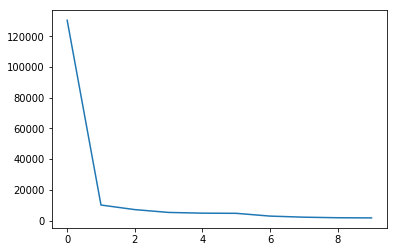

In [21]:
plt.plot(np.array(train_df[int_columns[5]].value_counts())[:10])

Некоторые значения наиболее встречающееся (>12000 с идентификатором <2), остальные редко встречаются

Графики разброса данных в выбранных колонках (hue - по каким значениям выводить разброс)

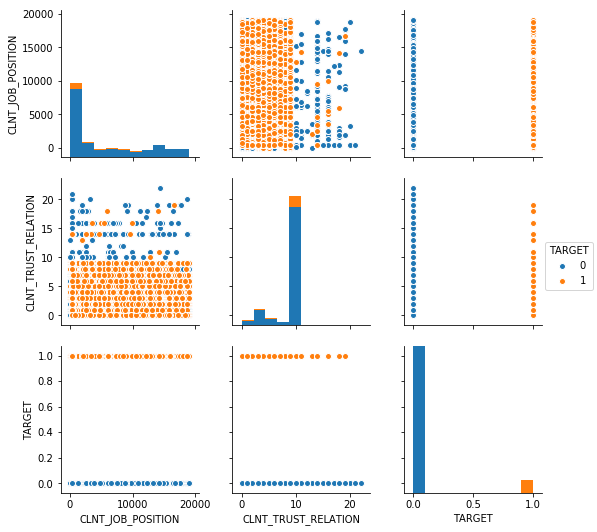

In [22]:
sns.pairplot(train_df[[int_columns[5], int_columns[1], int_columns[14]]], hue=int_columns[14])

Удаляем CLNT_JOB_POSITION

In [23]:
train_df.drop('CLNT_JOB_POSITION', axis=1, inplace=True)

In [24]:
train_df.shape

(320763, 114)

Выбираем колонки типа float в отдельную таблицу

In [25]:
float_cols = train_df.select_dtypes(float).columns

In [26]:
train_df.select_dtypes(float).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320763 entries, 0 to 320762
Data columns (total 100 columns):
AMOUNT_RUB_CLO_PRC            286213 non-null float64
PRC_ACCEPTS_A_EMAIL_LINK      139950 non-null float64
APP_REGISTR_RGN_CODE          54850 non-null float64
PRC_ACCEPTS_A_POS             139950 non-null float64
PRC_ACCEPTS_A_TK              139950 non-null float64
TURNOVER_DYNAMIC_IL_1M        320763 non-null float64
CNT_TRAN_AUT_TENDENCY1M       69535 non-null float64
SUM_TRAN_AUT_TENDENCY1M       69535 non-null float64
AMOUNT_RUB_SUP_PRC            286213 non-null float64
PRC_ACCEPTS_A_AMOBILE         139950 non-null float64
SUM_TRAN_AUT_TENDENCY3M       100204 non-null float64
PRC_ACCEPTS_TK                139950 non-null float64
PRC_ACCEPTS_A_MTP             139950 non-null float64
REST_DYNAMIC_FDEP_1M          320763 non-null float64
CNT_TRAN_AUT_TENDENCY3M       100204 non-null float64
CNT_ACCEPTS_TK                139950 non-null float64
REST_DYNAMIC_SAVE_3M       

Почти в каждой колонке есть NaN (всего 320762) 

In [27]:
for i in train_df.select_dtypes(float).columns:
    if len(train_df[i].unique()) < 5:
        print(i, train_df[i].unique())

PRC_ACCEPTS_A_EMAIL_LINK [ 0. nan]
PRC_ACCEPTS_A_POS [ 0. nan]
PRC_ACCEPTS_A_TK [ 0. nan]
PRC_ACCEPTS_A_AMOBILE [ 0. nan]
PRC_ACCEPTS_TK [ 0. nan]
PRC_ACCEPTS_A_MTP [ 0. nan]
CNT_ACCEPTS_TK [ 0. nan]
PRC_ACCEPTS_A_ATM [ 0. nan]
PRC_ACCEPTS_MTP [ 0. nan]
CNT_ACCEPTS_MTP [ 0. nan]
LDEAL_DELINQ_PER_MAXYQZ [nan 0.  1.  0.5]
MED_DEBT_PRC_YQZ [nan 1.  0.  0.5]
LDEAL_DELINQ_PER_MAXYWZ [0.  nan 0.5 1. ]


Видно, что в колонках с 2 уникальными значениями, только 0 и NaN. Такие колонки можно удалить

In [28]:
for i in train_df.select_dtypes(float).columns:
    if len(train_df[i].unique()) < 3:
        train_df.drop(i, axis=1, inplace=True)

In [29]:
train_df.shape

(320763, 104)

NaN во float-колонках заменяем mean-значениями

In [30]:
for i in train_df.select_dtypes(float).columns:
    train_df[i].fillna(train_df[i].mean(), inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320763 entries, 0 to 320762
Columns: 104 entries, CR_PROD_CNT_IL to TARGET
dtypes: float64(90), int64(14)
memory usage: 267.0 MB


In [31]:
y = train_df['TARGET']
x = train_df.drop('TARGET', axis = 1)
x.shape, y.shape

((320763, 103), (320763,))

In [32]:
used_cols = x.columns

Получается 103 features

### Построение модели

Объявление применяеных библиотек

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import f1_score, accuracy_score, average_precision_score,\
                            confusion_matrix, roc_curve, precision_recall_curve, auc

### Decision tree 

In [34]:
#x = train_df.drop('TARGET', axis = 1)
#y = train_df['TARGET']
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.33,
    random_state = 42)

Метод GridSearch для нахождения лучших параметров для decision tree

In [35]:
decision_tree = DT(class_weight={0: 1, 1: 10}) # 1 меньше в 10 раз, то 1 в 10 раз больший вес для балансировки

# Итерируем до подбора наиболее лучших параметров
# Когда параметры перестанут улучшаться, можно остановиться

parameters_dt = {'min_samples_leaf': [1, 10, 100], 'max_depth': [1, 10, 100]} # 9 комбинаций = 3*3

# {'max_depth': 10, 'min_samples_leaf': 100}
#parameters_dt = {'min_samples_leaf': [50, 100, 150], 'max_depth': [5, 10, 15]}
#...

dt_cv = GridSearchCV(decision_tree, param_grid = parameters_dt, scoring = 'roc_auc')
# Проводим обучение на x_train и y_train
dt_cv.fit(x_train, y_train)
print(dt_cv.best_params_)

# Получаем вероятности для наших предсказаний
probabilities_dt_cv = dt_cv.predict_proba(x_test)[:,1]
# 1 колонка - вероятность TARGET=0
# 2 колонка - вероятность TARGET=1

{'max_depth': 10, 'min_samples_leaf': 100}


In [36]:
dt_cv.predict_proba(x_test)

array([[0.98393832, 0.01606168],
       [0.96742671, 0.03257329],
       [0.88948512, 0.11051488],
       ...,
       [0.3937397 , 0.6062603 ],
       [0.88948512, 0.11051488],
       [0.46202532, 0.53797468]])

In [37]:
#TPR = TP/(TP+FN)
#FPR = FP/(FP+TN)

false_positive_rates_dt_cv, true_positive_rates_dt_cv, _ = roc_curve(y_test, probabilities_dt_cv)
roc_auc_dt_cv = auc(false_positive_rates_dt_cv, true_positive_rates_dt_cv)

print('ROC AUC: ', roc_auc_dt_cv)

best_params = dt_cv.best_params_
best_res = roc_auc_dt_cv

ROC AUC:  0.8089555616609587


Лучшие параметры: max_depth=11, min_samples_leaf=241, ROC AUC=0.812772233806266

Переопределяем decision_tree для обучения на всем train_df и предсказания на test_df

In [38]:
decision_tree = DT(criterion='gini', min_samples_leaf=241, max_depth=11, random_state=0, class_weight={0: 1, 1: 10})

In [39]:
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 10}, criterion='gini',
            max_depth=11, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=241, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Confusion Matrix (для наглядности)

In [40]:
predictions_dt = decision_tree.predict(x_test)
confusion_dt = pd.DataFrame(confusion_matrix(y_test, predictions_dt))

TN, FP = confusion_dt[0][0], confusion_dt[0][1]
FN, TP = confusion_dt[1][0], confusion_dt[1][1]

print('Confusion matrix for Decision Tree:')
data = np.array([['','Predicted Zeros','Predicted Ones'],
            ['Zeros',TN,FP],
            ['Ones',FN,TP]])

print(pd.DataFrame(data=data[1:,1:],
              index=data[1:,0],
              columns=data[0,1:]))

Confusion matrix for Decision Tree:
      Predicted Zeros Predicted Ones
Zeros           68128           1947
Ones            28997           6780


In [41]:
probabilities_dt = decision_tree.predict_proba(x_test)[:,1]
false_positive_rates_dt, true_positive_rates_dt, _ = roc_curve(y_test, probabilities_dt)
roc_auc_dt = auc(false_positive_rates_dt, true_positive_rates_dt)
print('ROC AUC: ', roc_auc_dt)

ROC AUC:  0.8112300148697535


### Применяем обучения для test_df

In [42]:
train_df = pd.read_csv(train_dir)
test_df = pd.read_csv(test_dir)
train_df = train_df[train_df['TARGET'].notna()]
train_df['TARGET'] = train_df['TARGET'].round(0).astype(int)
y_train = train_df['TARGET']
train_df = train_df.drop('TARGET', axis = 1)

In [43]:
# В наборах train и  test оставляем только features-колонки,
# полученные после клинзинга данных (In[60])
train_df = train_df[used_cols] 
test_df = test_df[used_cols]
train_df.shape, test_df.shape

((320763, 103), (44399, 103))

In [44]:
concat_df = pd.concat([train_df,test_df])

In [45]:
le = preprocessing.LabelEncoder()
for column_name in concat_df.columns:
    if train_df[column_name].dtype == object:
        # Чтобы замена object была унифицирована в разрезе двух массивов, используем конкатенированный массив
        le.fit(concat_df[column_name].astype(str)) 
        train_df[column_name] = le.transform(train_df[column_name].astype(str))
        test_df[column_name] = le.transform(test_df[column_name].astype(str)) 
        
for i in train_df.select_dtypes(float).columns:
    # Чтобы ускорить замену, mean() делаем по train_df, а не concat_df
    train_df[i].fillna(train_df[i].mean(), inplace=True)
    test_df[i].fillna(train_df[i].mean(), inplace=True)

x_train = train_df
x_test = test_df
x_train.shape, x_test.shape

((320763, 103), (44399, 103))

### CatBoost

In [46]:
import catboost as ctboost

In [47]:
# Создаем классификатор
ctb = ctboost.CatBoostClassifier()

In [48]:
# Обучаем модель
ctb.fit(x_train, y_train)

Learning rate set to 0.085778
0:	learn: 0.5948094	total: 463ms	remaining: 7m 42s
1:	learn: 0.5191346	total: 844ms	remaining: 7m 1s
2:	learn: 0.4560894	total: 1.23s	remaining: 6m 50s
3:	learn: 0.4103490	total: 1.63s	remaining: 6m 46s
4:	learn: 0.3747707	total: 1.98s	remaining: 6m 34s
5:	learn: 0.3500006	total: 2.38s	remaining: 6m 34s
6:	learn: 0.3291280	total: 2.72s	remaining: 6m 26s
7:	learn: 0.3114775	total: 3.12s	remaining: 6m 27s
8:	learn: 0.2979933	total: 3.47s	remaining: 6m 22s
9:	learn: 0.2876429	total: 3.83s	remaining: 6m 18s
10:	learn: 0.2804193	total: 4.2s	remaining: 6m 17s
11:	learn: 0.2743003	total: 4.59s	remaining: 6m 17s
12:	learn: 0.2672590	total: 4.94s	remaining: 6m 15s
13:	learn: 0.2615043	total: 5.31s	remaining: 6m 13s
14:	learn: 0.2570299	total: 5.64s	remaining: 6m 10s
15:	learn: 0.2535514	total: 6.03s	remaining: 6m 10s
16:	learn: 0.2506120	total: 6.41s	remaining: 6m 10s
17:	learn: 0.2477499	total: 6.76s	remaining: 6m 8s
18:	learn: 0.2453664	total: 7.1s	remaining: 6m 

157:	learn: 0.2173156	total: 1m 2s	remaining: 5m 30s
158:	learn: 0.2172660	total: 1m 2s	remaining: 5m 30s
159:	learn: 0.2171927	total: 1m 2s	remaining: 5m 30s
160:	learn: 0.2171383	total: 1m 3s	remaining: 5m 30s
161:	learn: 0.2171032	total: 1m 3s	remaining: 5m 30s
162:	learn: 0.2170748	total: 1m 4s	remaining: 5m 30s
163:	learn: 0.2170378	total: 1m 4s	remaining: 5m 30s
164:	learn: 0.2170057	total: 1m 5s	remaining: 5m 30s
165:	learn: 0.2169715	total: 1m 5s	remaining: 5m 30s
166:	learn: 0.2169359	total: 1m 6s	remaining: 5m 30s
167:	learn: 0.2168901	total: 1m 6s	remaining: 5m 30s
168:	learn: 0.2168320	total: 1m 7s	remaining: 5m 30s
169:	learn: 0.2167892	total: 1m 7s	remaining: 5m 29s
170:	learn: 0.2167307	total: 1m 8s	remaining: 5m 29s
171:	learn: 0.2166956	total: 1m 8s	remaining: 5m 29s
172:	learn: 0.2166777	total: 1m 8s	remaining: 5m 29s
173:	learn: 0.2166584	total: 1m 9s	remaining: 5m 29s
174:	learn: 0.2166238	total: 1m 9s	remaining: 5m 29s
175:	learn: 0.2165789	total: 1m 10s	remaining:

310:	learn: 0.2124690	total: 2m 6s	remaining: 4m 40s
311:	learn: 0.2124419	total: 2m 6s	remaining: 4m 39s
312:	learn: 0.2124280	total: 2m 7s	remaining: 4m 39s
313:	learn: 0.2124118	total: 2m 7s	remaining: 4m 38s
314:	learn: 0.2123922	total: 2m 7s	remaining: 4m 38s
315:	learn: 0.2123629	total: 2m 8s	remaining: 4m 37s
316:	learn: 0.2123411	total: 2m 8s	remaining: 4m 37s
317:	learn: 0.2123154	total: 2m 9s	remaining: 4m 36s
318:	learn: 0.2122851	total: 2m 9s	remaining: 4m 36s
319:	learn: 0.2122758	total: 2m 9s	remaining: 4m 36s
320:	learn: 0.2122560	total: 2m 10s	remaining: 4m 35s
321:	learn: 0.2122439	total: 2m 10s	remaining: 4m 35s
322:	learn: 0.2122314	total: 2m 10s	remaining: 4m 34s
323:	learn: 0.2122142	total: 2m 11s	remaining: 4m 34s
324:	learn: 0.2121895	total: 2m 11s	remaining: 4m 33s
325:	learn: 0.2121420	total: 2m 12s	remaining: 4m 33s
326:	learn: 0.2120974	total: 2m 12s	remaining: 4m 32s
327:	learn: 0.2120751	total: 2m 12s	remaining: 4m 32s
328:	learn: 0.2120532	total: 2m 13s	re

464:	learn: 0.2092134	total: 3m 7s	remaining: 3m 35s
465:	learn: 0.2091878	total: 3m 7s	remaining: 3m 35s
466:	learn: 0.2091528	total: 3m 8s	remaining: 3m 34s
467:	learn: 0.2091407	total: 3m 8s	remaining: 3m 34s
468:	learn: 0.2091037	total: 3m 8s	remaining: 3m 33s
469:	learn: 0.2090894	total: 3m 9s	remaining: 3m 33s
470:	learn: 0.2090767	total: 3m 9s	remaining: 3m 33s
471:	learn: 0.2090599	total: 3m 10s	remaining: 3m 32s
472:	learn: 0.2090485	total: 3m 10s	remaining: 3m 32s
473:	learn: 0.2090362	total: 3m 10s	remaining: 3m 31s
474:	learn: 0.2090205	total: 3m 11s	remaining: 3m 31s
475:	learn: 0.2089972	total: 3m 11s	remaining: 3m 30s
476:	learn: 0.2089876	total: 3m 11s	remaining: 3m 30s
477:	learn: 0.2089758	total: 3m 12s	remaining: 3m 29s
478:	learn: 0.2089567	total: 3m 12s	remaining: 3m 29s
479:	learn: 0.2089448	total: 3m 12s	remaining: 3m 28s
480:	learn: 0.2089372	total: 3m 13s	remaining: 3m 28s
481:	learn: 0.2089139	total: 3m 13s	remaining: 3m 28s
482:	learn: 0.2088950	total: 3m 13s

617:	learn: 0.2065941	total: 4m 3s	remaining: 2m 30s
618:	learn: 0.2065742	total: 4m 3s	remaining: 2m 30s
619:	learn: 0.2065464	total: 4m 4s	remaining: 2m 29s
620:	learn: 0.2065339	total: 4m 4s	remaining: 2m 29s
621:	learn: 0.2065265	total: 4m 4s	remaining: 2m 28s
622:	learn: 0.2065083	total: 4m 5s	remaining: 2m 28s
623:	learn: 0.2064971	total: 4m 5s	remaining: 2m 27s
624:	learn: 0.2064807	total: 4m 5s	remaining: 2m 27s
625:	learn: 0.2064695	total: 4m 6s	remaining: 2m 27s
626:	learn: 0.2064632	total: 4m 6s	remaining: 2m 26s
627:	learn: 0.2064564	total: 4m 7s	remaining: 2m 26s
628:	learn: 0.2064375	total: 4m 7s	remaining: 2m 25s
629:	learn: 0.2064177	total: 4m 7s	remaining: 2m 25s
630:	learn: 0.2063914	total: 4m 8s	remaining: 2m 25s
631:	learn: 0.2063643	total: 4m 8s	remaining: 2m 24s
632:	learn: 0.2063532	total: 4m 8s	remaining: 2m 24s
633:	learn: 0.2063391	total: 4m 9s	remaining: 2m 23s
634:	learn: 0.2063269	total: 4m 9s	remaining: 2m 23s
635:	learn: 0.2063155	total: 4m 9s	remaining: 

771:	learn: 0.2042949	total: 5m 6s	remaining: 1m 30s
772:	learn: 0.2042803	total: 5m 7s	remaining: 1m 30s
773:	learn: 0.2042617	total: 5m 7s	remaining: 1m 29s
774:	learn: 0.2042421	total: 5m 8s	remaining: 1m 29s
775:	learn: 0.2042219	total: 5m 8s	remaining: 1m 29s
776:	learn: 0.2042103	total: 5m 9s	remaining: 1m 28s
777:	learn: 0.2041966	total: 5m 9s	remaining: 1m 28s
778:	learn: 0.2041736	total: 5m 10s	remaining: 1m 27s
779:	learn: 0.2041639	total: 5m 10s	remaining: 1m 27s
780:	learn: 0.2041500	total: 5m 10s	remaining: 1m 27s
781:	learn: 0.2041406	total: 5m 11s	remaining: 1m 26s
782:	learn: 0.2041231	total: 5m 11s	remaining: 1m 26s
783:	learn: 0.2041046	total: 5m 12s	remaining: 1m 26s
784:	learn: 0.2040948	total: 5m 12s	remaining: 1m 25s
785:	learn: 0.2040891	total: 5m 13s	remaining: 1m 25s
786:	learn: 0.2040790	total: 5m 13s	remaining: 1m 24s
787:	learn: 0.2040649	total: 5m 14s	remaining: 1m 24s
788:	learn: 0.2040544	total: 5m 14s	remaining: 1m 24s
789:	learn: 0.2040447	total: 5m 14s

926:	learn: 0.2020874	total: 6m 12s	remaining: 29.3s
927:	learn: 0.2020761	total: 6m 12s	remaining: 28.9s
928:	learn: 0.2020647	total: 6m 13s	remaining: 28.5s
929:	learn: 0.2020519	total: 6m 13s	remaining: 28.1s
930:	learn: 0.2020363	total: 6m 14s	remaining: 27.7s
931:	learn: 0.2020217	total: 6m 14s	remaining: 27.3s
932:	learn: 0.2020140	total: 6m 15s	remaining: 26.9s
933:	learn: 0.2020053	total: 6m 15s	remaining: 26.5s
934:	learn: 0.2019875	total: 6m 15s	remaining: 26.1s
935:	learn: 0.2019734	total: 6m 16s	remaining: 25.7s
936:	learn: 0.2019656	total: 6m 16s	remaining: 25.3s
937:	learn: 0.2019511	total: 6m 17s	remaining: 24.9s
938:	learn: 0.2019449	total: 6m 17s	remaining: 24.5s
939:	learn: 0.2019371	total: 6m 18s	remaining: 24.1s
940:	learn: 0.2019266	total: 6m 18s	remaining: 23.7s
941:	learn: 0.2019205	total: 6m 18s	remaining: 23.3s
942:	learn: 0.2018958	total: 6m 19s	remaining: 22.9s
943:	learn: 0.2018844	total: 6m 19s	remaining: 22.5s
944:	learn: 0.2018708	total: 6m 20s	remaining:

In [49]:
# Находим вероятности для предсказаний
probabilities_ctb = ctb.predict_proba(x_test)[:,1]

In [52]:
# Создаем массив из идентификаторов
A = np.array(pd.read_csv(test_dir)['ID']).astype(str)

In [53]:
# Создаем массив из вероятностей
B = np.array(probabilities_ctb)

In [54]:
# Объединяем массивы в таблицу
result = pd.DataFrame(np.vstack([A,B]).T, columns=['id', 'target'])
result.head()

,id,target
0,519130,0.24249748686927228
1,234045,0.011138228428915185
2,401256,0.004250296075491689
3,551070,0.014024731536832027
4,367285,0.007702845040542858


In [56]:
result.to_csv('lab04s.csv',sep='\t', index=False)